EDA


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline

In [3]:
# Loading the file
data_teleco = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
# Checking for the top 5 records using head
data_teleco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# To check the shape of the data set we use shape
data_teleco.shape

(7043, 21)

In [6]:
# we can see the column types 
data_teleco.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
# To check the data types of the columns we use dtypes
data_teleco.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
# To know statistics of the numerical variables we use describe. In the data we have three numerical variables as shown above
data_teleco.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


PLOTS

Text(0.5, 1.02, 'Count of TARGET Variable per category')

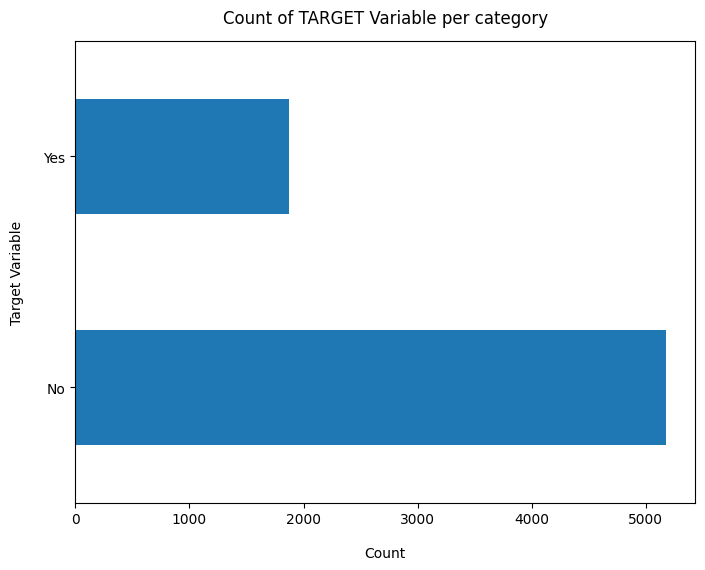

In [9]:
data_teleco['Churn'].value_counts().plot(kind = 'barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad = 14)
plt.title("Count of TARGET Variable per category", y = 1.02)

In [10]:
# Calculating the percentage of churn and not churn customers
100*data_teleco['Churn'].value_counts() / len(data_teleco['Churn'])


No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [11]:
data_teleco['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

-> Here we can see that the data is imbalanced as the data is having more percentage of No than Yes.
-> So, We have to analyze the data with other features while taking the target values separately to get some insights.

In [12]:
# Here we are checking for non null data as if there are any null values we can manage them
data_teleco.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


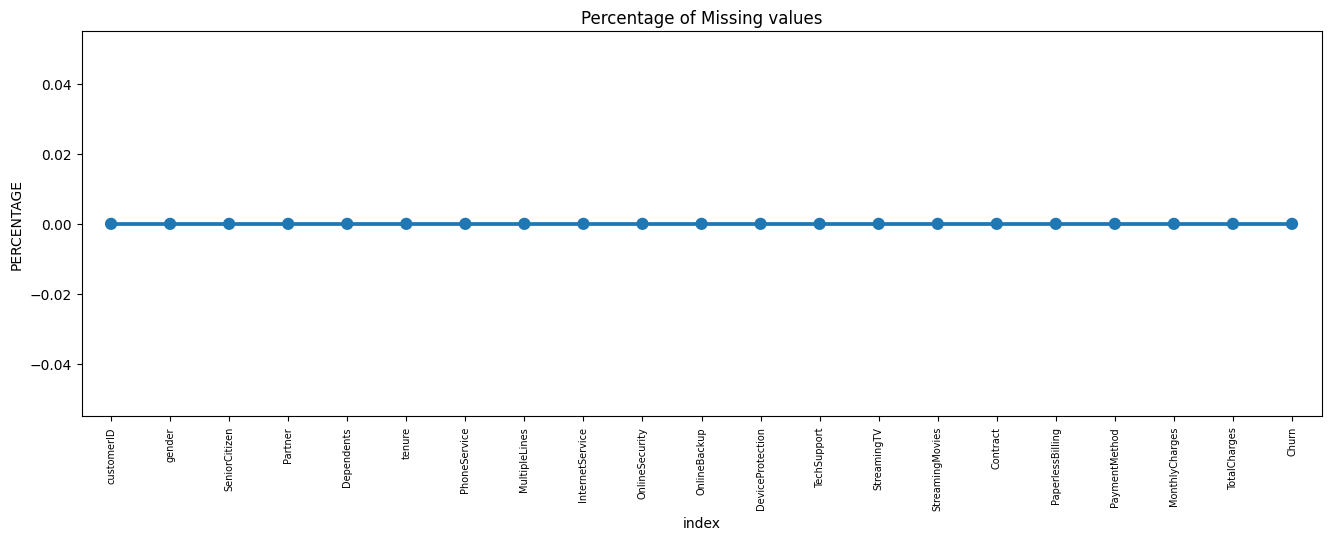

In [13]:
missing= pd.DataFrame((data_teleco.isnull().sum())*100 / data_teleco.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

Analysis from the point plot:

1. Here we can see we don't have any missing data

DATA CLEANING

In [14]:
# We have data in object format which can be converted to numerical and get some insights
data_teleco2 = data_teleco.copy()

In [15]:
data_teleco2.TotalCharges = pd.to_numeric(data_teleco2.TotalCharges, errors='coerce')
data_teleco2.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Here we can see there are 11 NULL values in the TotalCharges column

In [16]:
# To show those null values we can use this command
data_teleco2.loc[data_teleco2['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Handling Missing values 

-> As the missing values are very low which is 11 out of 7043 that is only 0.15%. It is safe to ignore those values for further processing


In [17]:
# Now removing the missing values
data_teleco2.dropna(how='any', inplace=True)

In [18]:
data_teleco2.shape

(7032, 21)

In [19]:
# Now dividing the customers into blocks based on the tenure 
# Finding the maximum tenure from all the variables
print(data_teleco2['tenure'].max())

72


In [20]:
labels = ["{0} - {1}".format(i, i+11) for i in range(1, 72, 12)]

data_teleco2['tenure_grp'] = pd.cut(data_teleco2.tenure, range(1, 80, 12), right=False, labels=labels)

In [21]:
data_teleco2['tenure_grp'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_grp, dtype: int64

From the table there is no relation of customer ID with the Churn or not customer ID is a random number and we have divided the tenure into tenure groups. So, there is no need of tenure column now.

In [22]:
data_teleco2.drop(columns=['customerID', 'tenure'], axis=1, inplace=True)
data_teleco2.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_grp
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


Data Exploration

In [23]:
# Plot distributions of individual predictors by churn


UNIVARIATE ANALYSIS

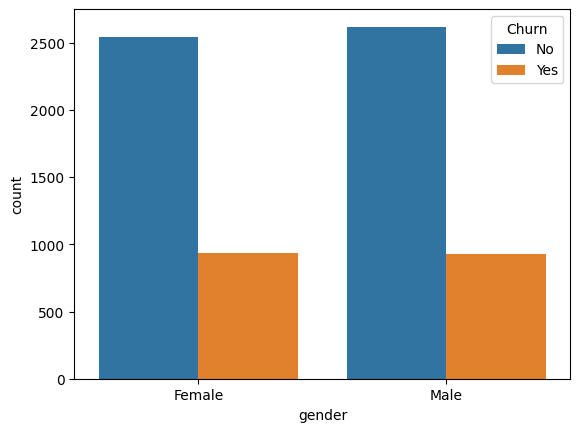

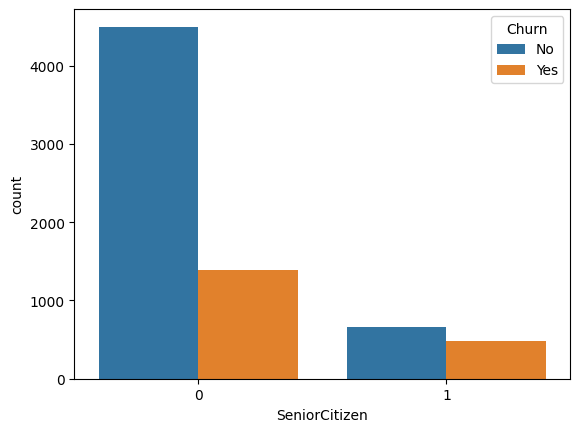

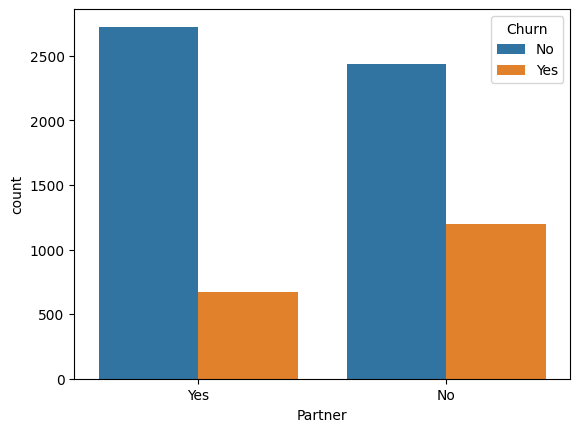

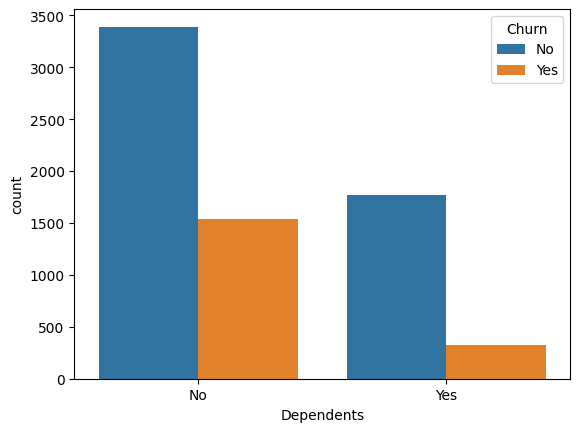

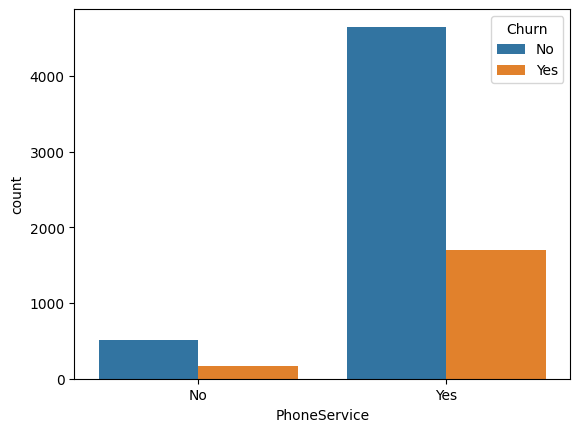

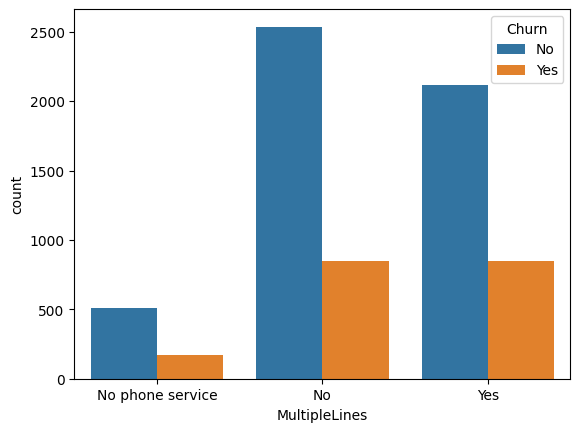

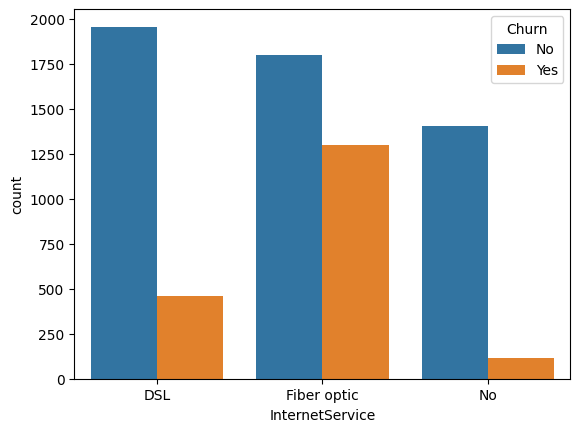

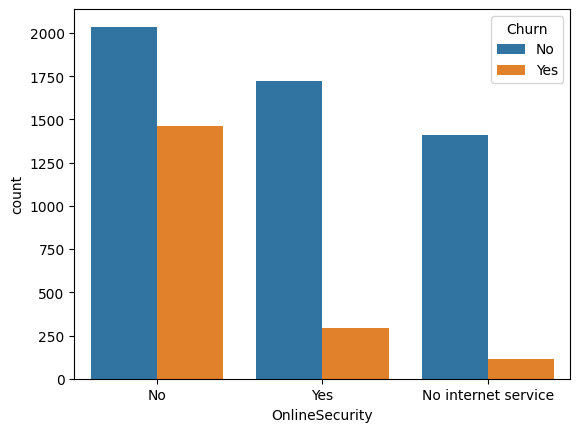

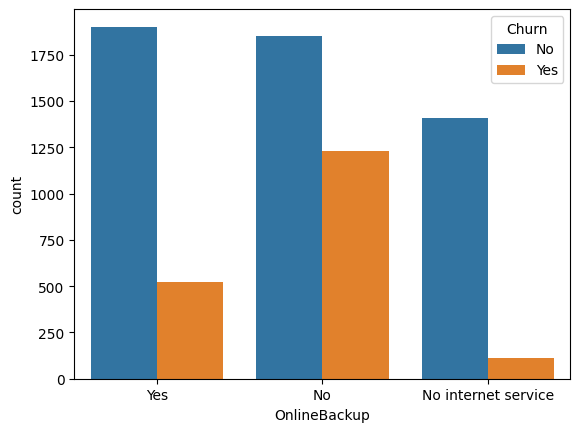

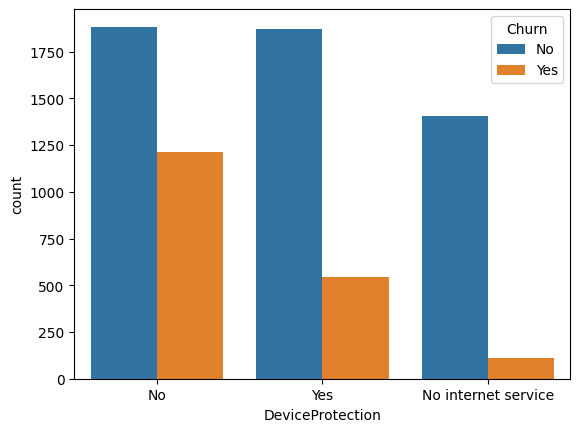

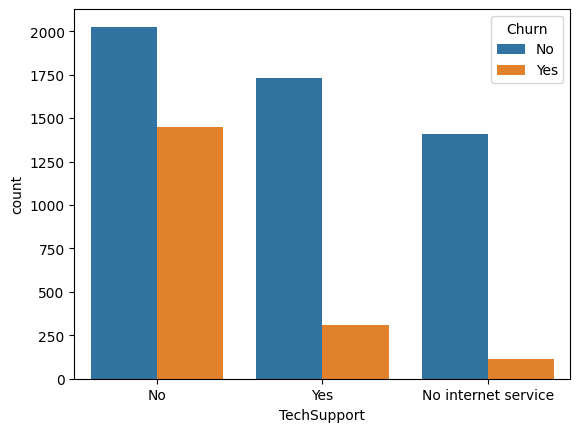

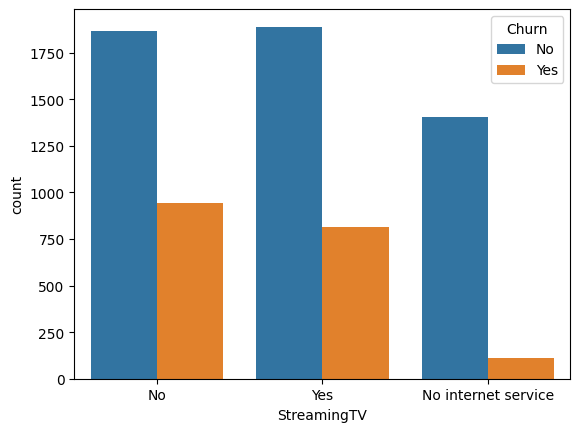

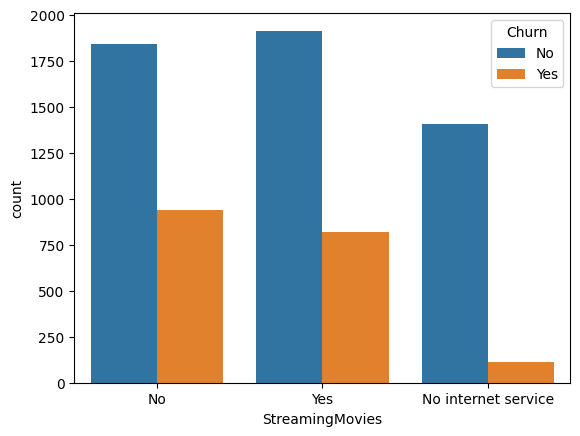

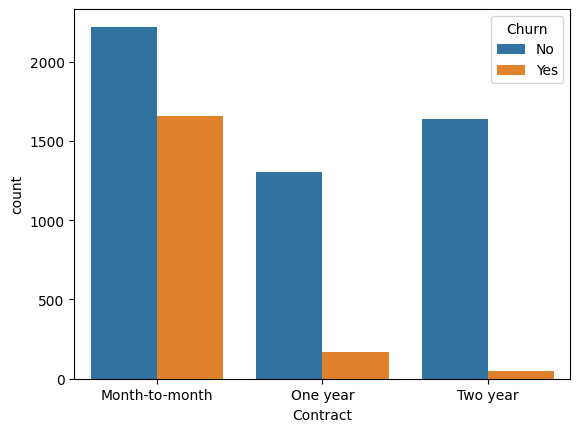

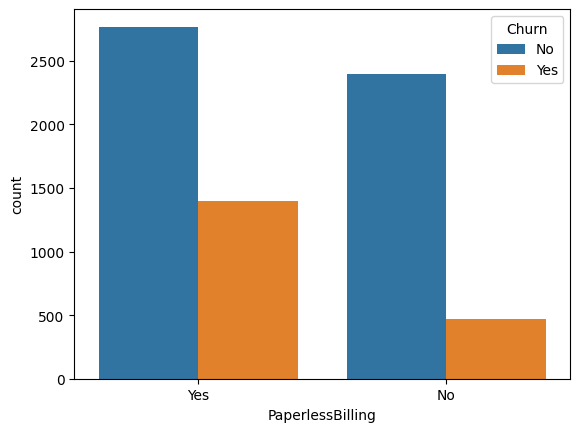

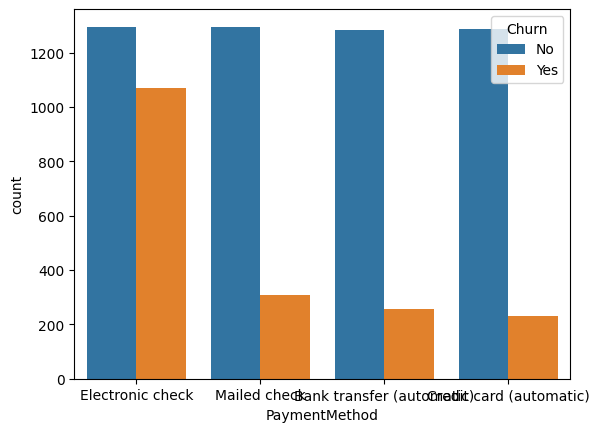

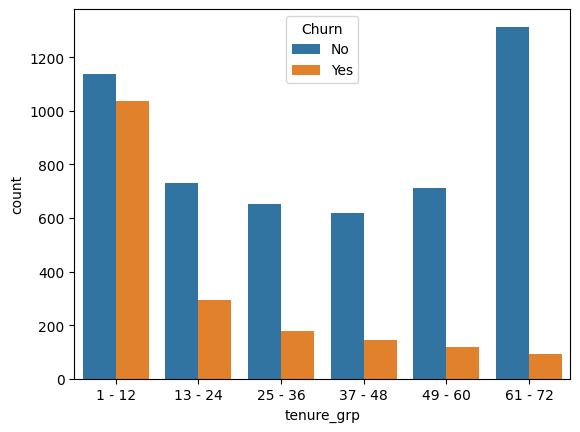

In [24]:
for i, predictor in enumerate(data_teleco2.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=data_teleco2, x=predictor, hue='Churn')

Now, Converting the target variable 'Churn' into a binary numeric variable i.e Yes=1, No=0

In [25]:
data_teleco2['Churn'] = np.where(data_teleco2.Churn == 'Yes', 1, 0)

In [26]:
data_teleco2.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_grp
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


Converting all the categorical variables into dummy variables. Here we are using one hot encoding

In [27]:
data_teleco_dummies = pd.get_dummies(data_teleco2)
data_teleco_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_grp_1 - 12,tenure_grp_13 - 24,tenure_grp_25 - 36,tenure_grp_37 - 48,tenure_grp_49 - 60,tenure_grp_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


Now we can find the relationship between the variables.
Relationship between Monthly Charges and Total Charges

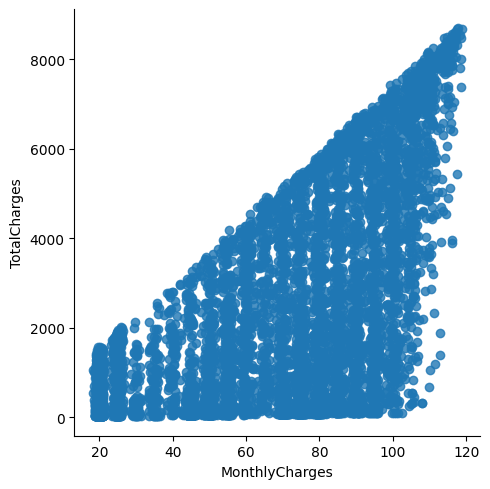

In [28]:
sns.lmplot(data=data_teleco_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

From the graph we can this is a linear plot as TotalCharges increases with the Monthly Charges - as expected

Churn by monthly charges and total charges

Text(0.5, 1.0, 'Monthly charges by churn')

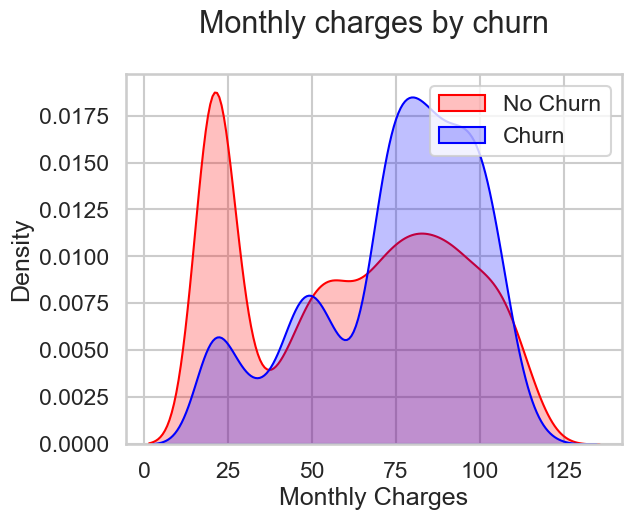

In [41]:
Mth_plot = sns.kdeplot(data_teleco_dummies.MonthlyCharges[(data_teleco_dummies["Churn"] == 0)], color="Red", fill=True)
Mth_plot = sns.kdeplot(data_teleco_dummies.MonthlyCharges[(data_teleco_dummies["Churn"] == 1)], color="Blue", fill=True)
Mth_plot.legend(["No Churn", "Churn"], loc='upper right')
Mth_plot.set_ylabel('Density')
Mth_plot.set_xlabel('Monthly Charges')
Mth_plot.set_title('Monthly charges by churn')


INSIGHT : From the graph we can observe when monthly charges goes high churn is also high.

Text(0.5, 1.0, 'Total charges by churn')

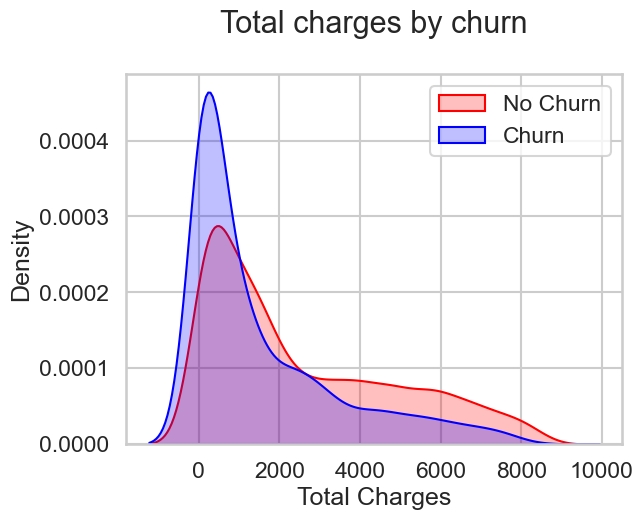

In [42]:
Total = sns.kdeplot(data_teleco_dummies.TotalCharges[(data_teleco_dummies["Churn"] == 0)], color="Red", fill= True)
Total = sns.kdeplot(data_teleco_dummies.TotalCharges[(data_teleco_dummies["Churn"] == 1)], color="Blue", fill= True)

Total.legend(["No Churn", "Churn"], loc='upper right')
Total.set_ylabel('Density')
Total.set_xlabel('Total Charges')
Total.set_title('Total charges by churn')

From this graph as we see it is surprising insight that as higher churn is there at lower total charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear.

-> Higher Monthly Charges at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linked to High Churn.

BUILDING A CORELATION OF ALL PREDICTORS WITH 'Churn'

<Axes: >

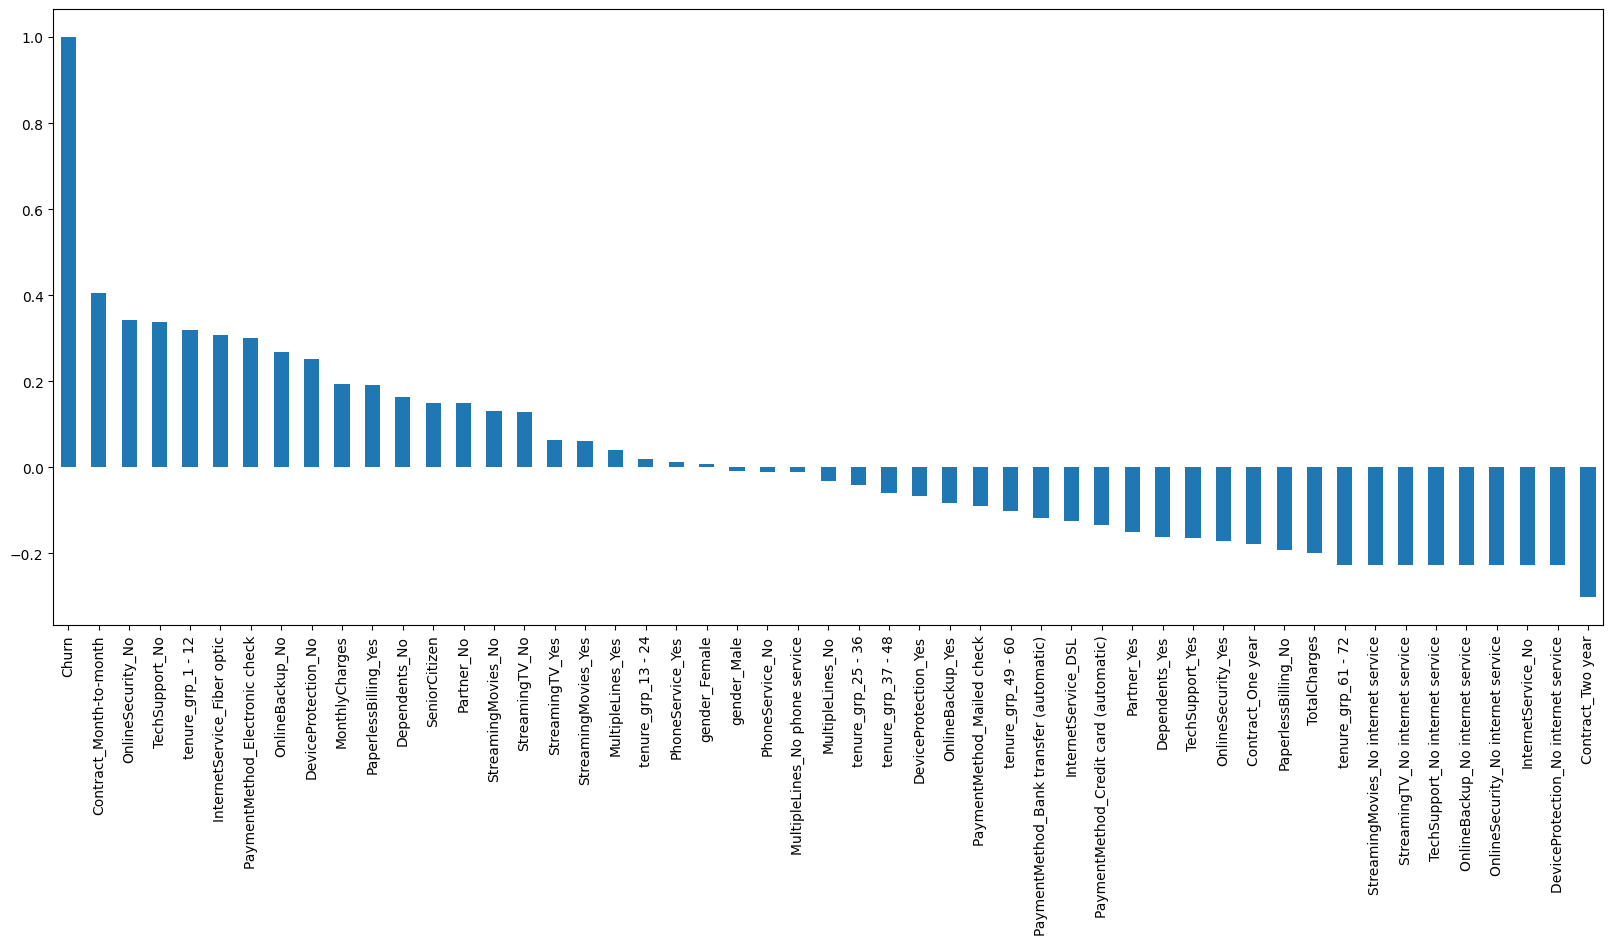

In [31]:
plt.figure(figsize=(20, 8))
data_teleco_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind = 'bar')

Insights Derived

HIGH Churn seen in case of Month to Month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet.

LOW Churn is seen in case of Long Term Contracts, Subscrijptions without Internet Service and The customer engaged for 5+ years.

Factors like Gender, Availability of PhoneService and Number of Multiple lines have almost NO impact on Churn.

This is also evident from the Heatmap below.

<Axes: >

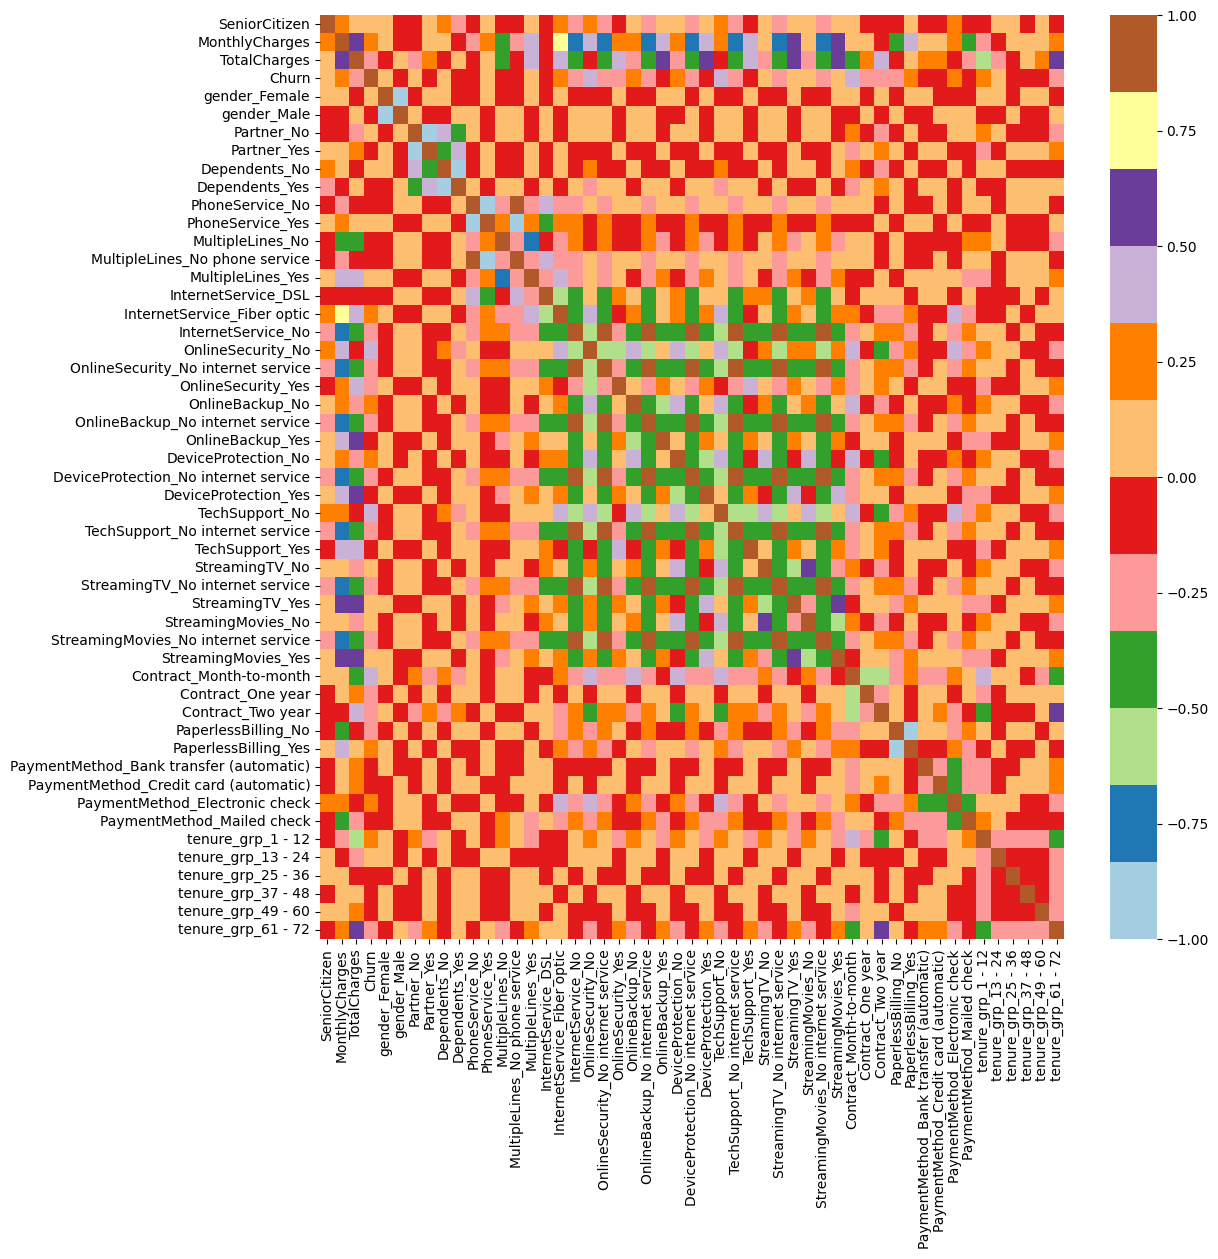

In [32]:
plt.figure(figsize=(12,12))
sns.heatmap(data_teleco_dummies.corr(), cmap="Paired")

BIVARIATE ANALYSIS
Analysis of two variables

In [33]:
new_df1_target0 = data_teleco2.loc[data_teleco2["Churn"] == 0]
new_df1_target1 = data_teleco2.loc[data_teleco2["Churn"] == 1]

In [34]:
def uniplot(df, col, title, hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation= 45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x = col, order=df[col].value_counts().index, hue=hue, palette='bright')
    
    plt.show()

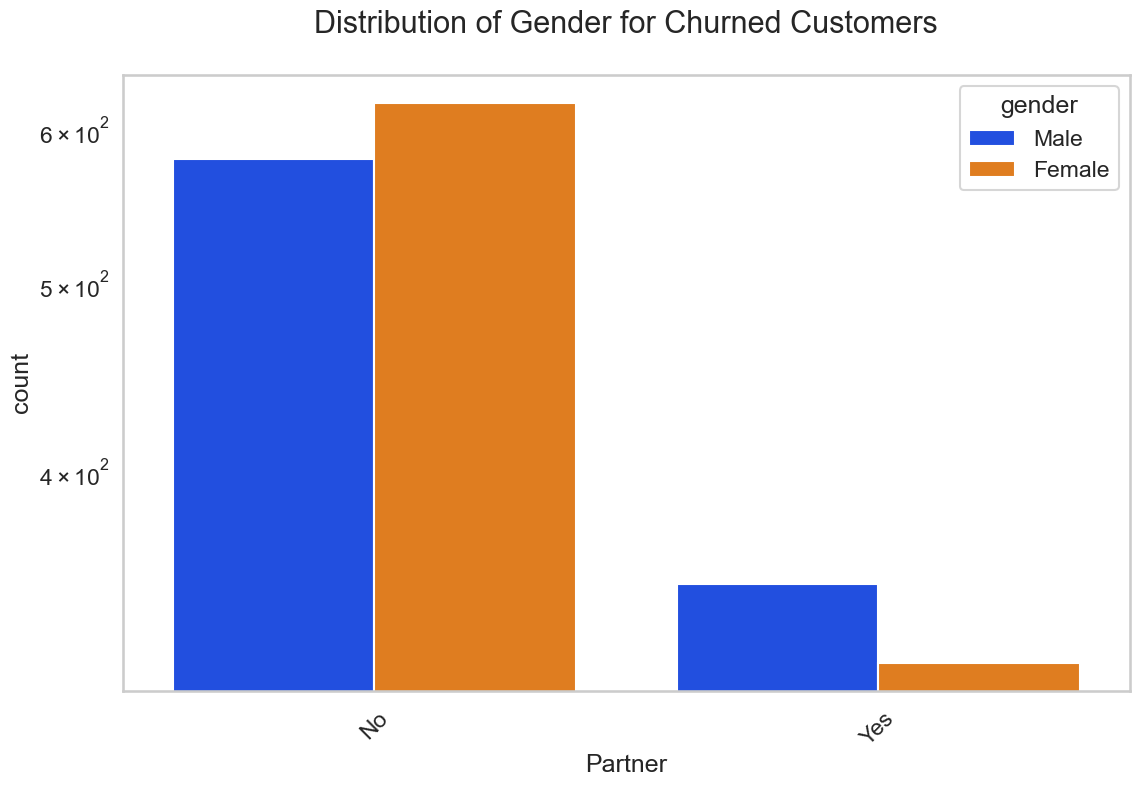

In [35]:
uniplot(new_df1_target1, col='Partner', title='Distribution of Gender for Churned Customers', hue='gender')

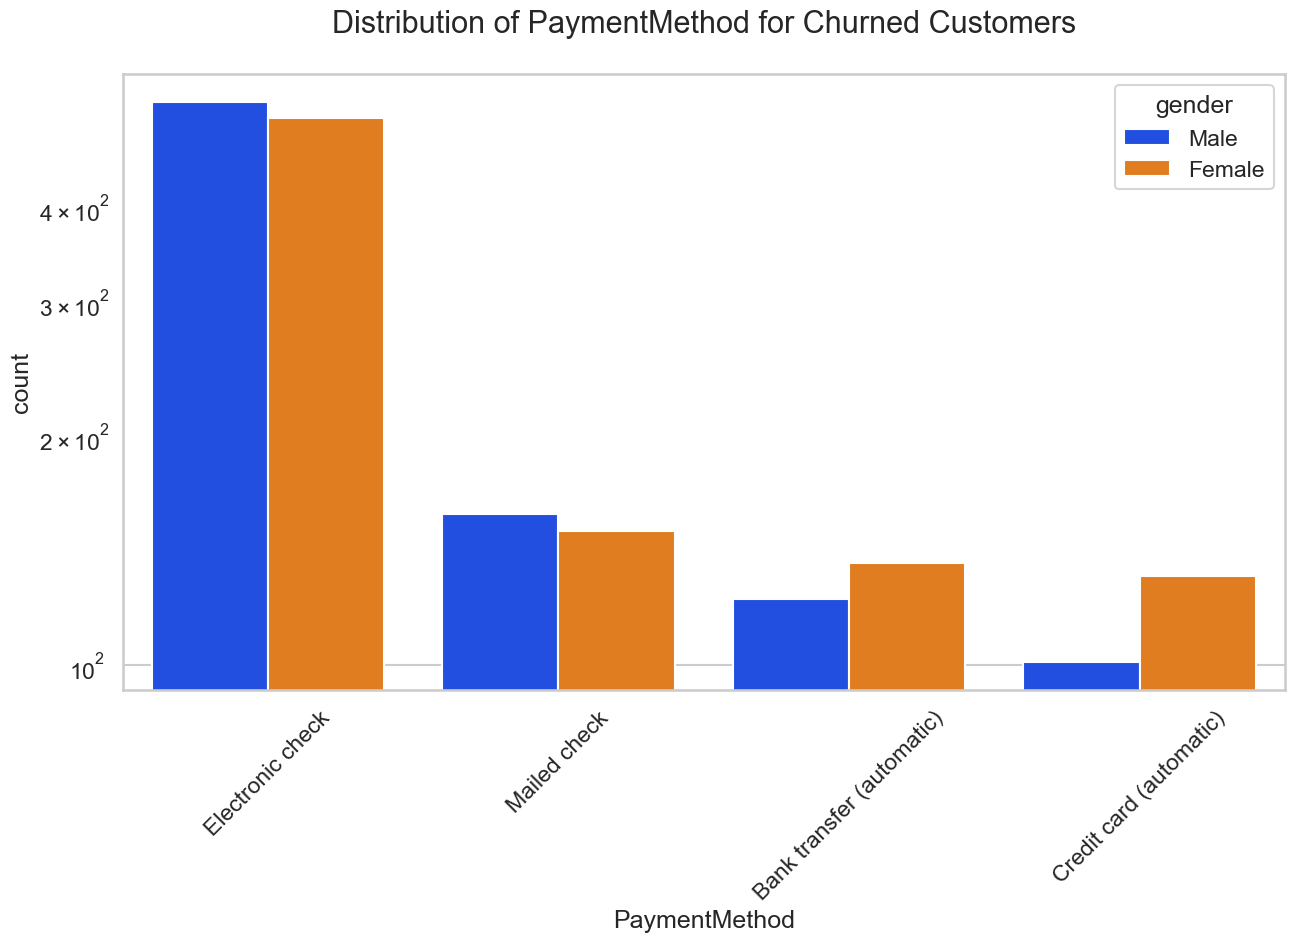

In [36]:
# Payment Method
uniplot(new_df1_target1, col='PaymentMethod', title='Distribution of PaymentMethod for Churned Customers', hue='gender')

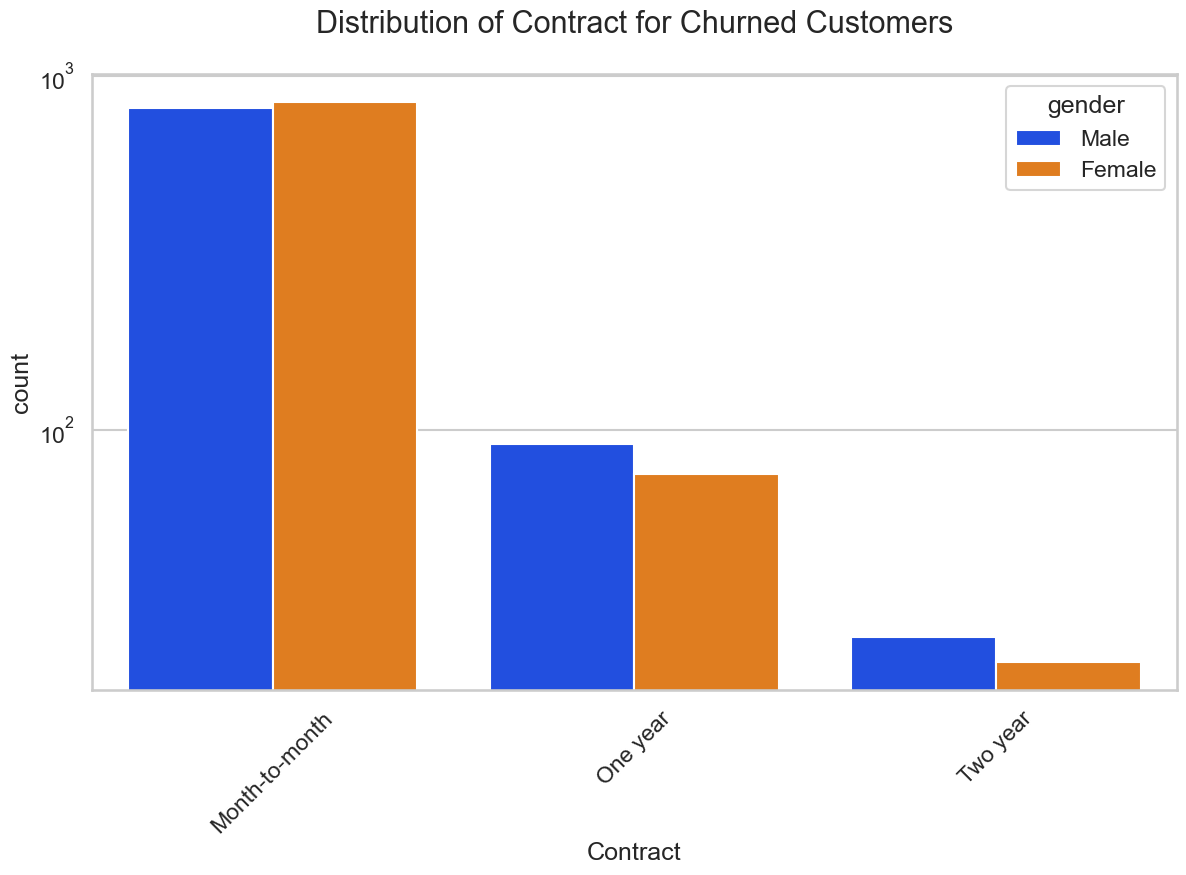

In [37]:
# Based on Contract
uniplot(new_df1_target1, col='Contract', title='Distribution of Contract for Churned Customers', hue='gender')

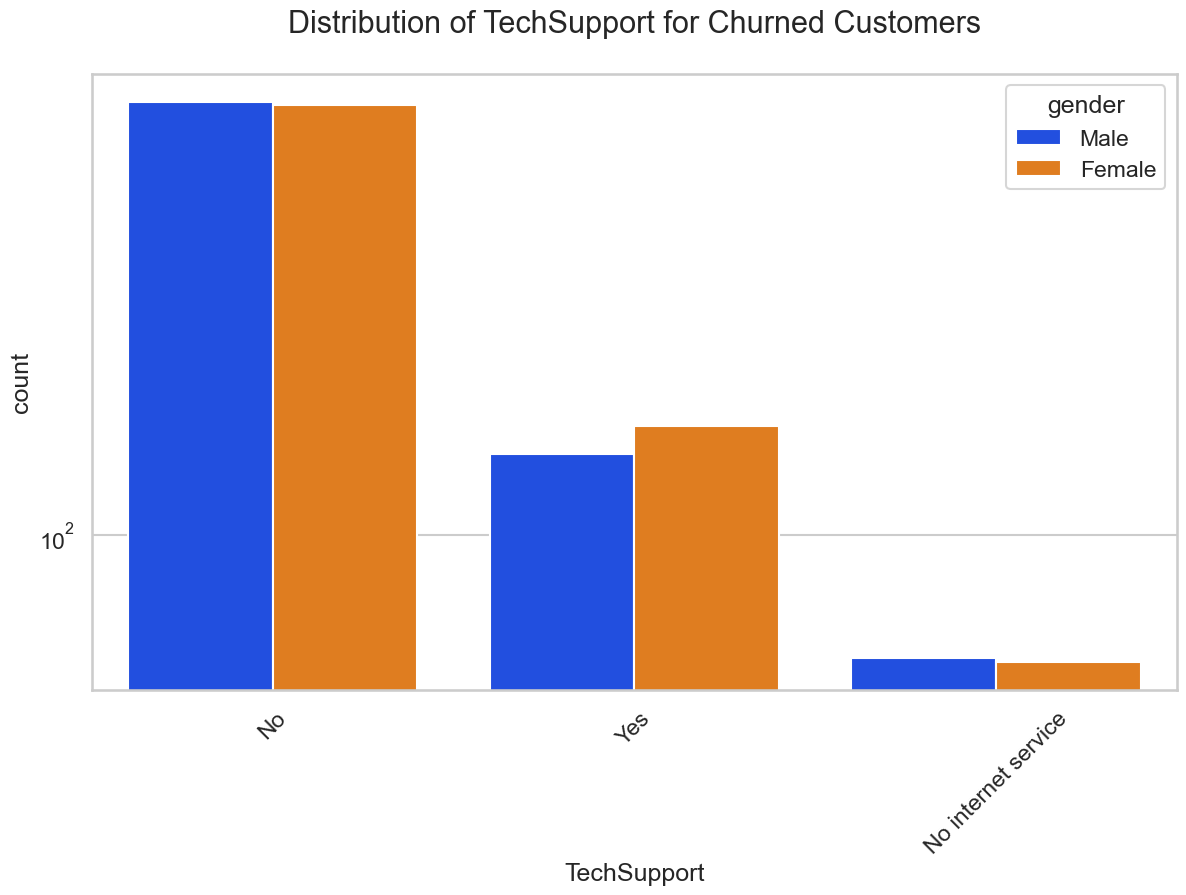

In [38]:
uniplot(new_df1_target1, col='TechSupport', title='Distribution of TechSupport for Churned Customers', hue='gender')

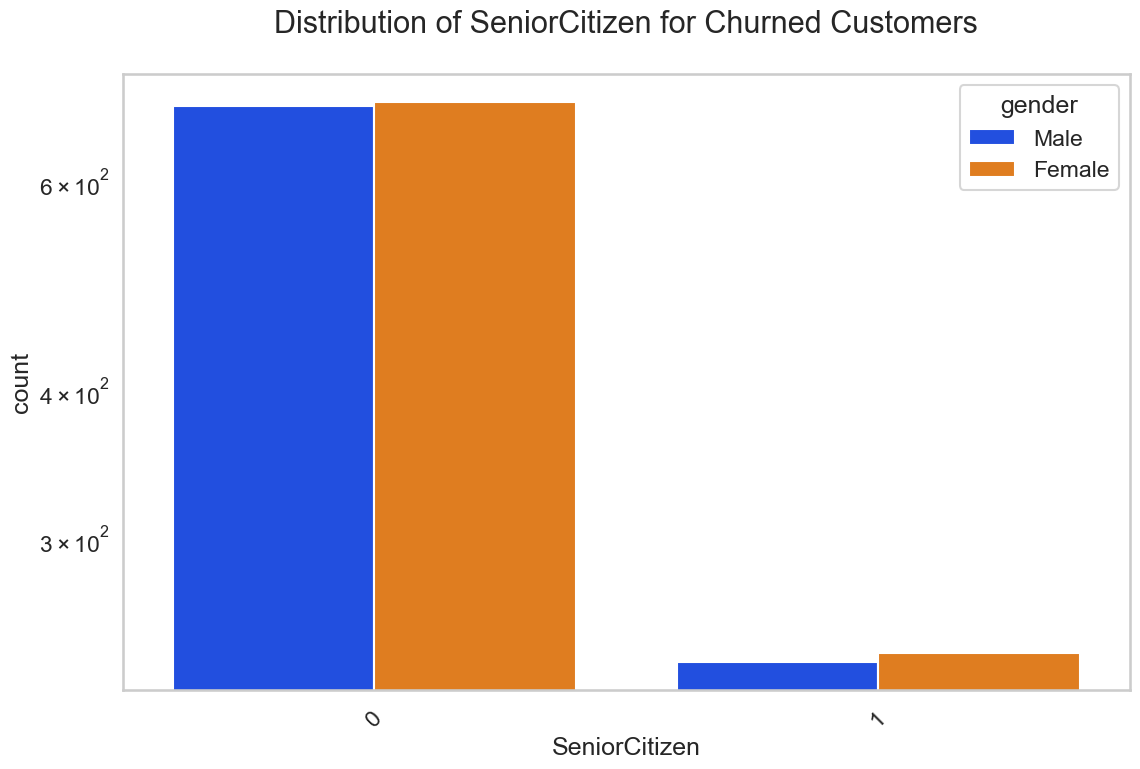

In [39]:
uniplot(new_df1_target1, col='SeniorCitizen', title='Distribution of SeniorCitizen for Churned Customers', hue='gender')

"""CONCLUSION"""

These are the quick insights from this exercise:

1. Electronic check medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are the free to go customers.
3. No Online security, No Tech Support category are high churners
4. Non senior citizens are high churners



In [40]:
data_teleco_dummies.to_csv('Telecom_churn.csv')